In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cost_revenue_dirty.csv')

In [ ]:
# PRELIMINARY DATA EXPLORATION

In [3]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [4]:
df.shape

(5391, 6)

In [5]:
df.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [6]:
df.isna().values.any()

False

In [7]:
df.duplicated().values.any()

False

In [9]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [11]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        df[col] = df[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    df[col] = pd.to_numeric(df[col])

C:\Users\Kempsly\AppData\Local\Temp\ipykernel_8628\4109516889.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].astype(str).str.replace(char, "")


In [12]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [15]:
# convert the date object to datetime
df.Release_Date = pd.to_datetime(df.Release_Date)
df.head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [17]:
# film that has 0 revenue

df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [18]:
# The average film costs about $31m to make and makes around 3x that (or ~$89m) in worldwide revenue
# The average film costs about $31m to make and makes around 3x that (or ~$89m) in worldwide revenue
# The minimum domestic and worldwide revenue is $0.

# On the other hand, the highest production budget was $425,000,000 
# and the highest worldwide revenue was $2,783,918,982. $2.7 Billion revenue.



In [19]:
# The film with the lowest budget in our dataframe
df[df.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [20]:
# The film with the highest budget in our dataframe

df[df.USD_Production_Budget == 4.250000e+08]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [21]:
# film with no domestic revenue
zero_domestic = df[df.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [23]:
# Films with no world wide revenue

zero_worldwide = df[df.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [24]:
# we see that there are 357 films that made no money internationally. Once

In [25]:
international_releases = df.loc[(df.USD_Domestic_Gross == 0) & 
                                  (df.USD_Worldwide_Gross != 0)]

In [26]:
# 
international_releases = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


In [28]:
scrape_date = pd.Timestamp('2018-5-1')
future_releases = df[df.Release_Date >= scrape_date]
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [29]:
# Remove unreleased films

df_clean = df.drop(future_releases.index)


In [30]:
# films that lost money(Budget > Revenue)

money_losing = df_clean.loc[df_clean.USD_Production_Budget > df_clean.USD_Worldwide_Gross]
len(money_losing)/len(df_clean)

0.37277117384843983

In [31]:
money_losing = df_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/df_clean.shape[0]

0.37277117384843983

In [32]:
# we see that a whopping 37.2%  of films do not recoup their production budget at the box office

In [46]:
# plt.figure(figsize=(8,4), dpi=200)
 
# ax = sns.scatterplot(data=df_clean,
#                      x='USD_Production_Budget', 
#                      y='USD_Worldwide_Gross')
 
# ax.set(ylim=(0, 3000000000),
#        xlim=(0, 450000000),
#        ylabel='Revenue in $ billions',
#        xlabel='Budget in $100 millions')
 
# plt.show()

In [45]:
# plt.figure(figsize=(8,4), dpi=200)
# ax = sns.scatterplot(data=df_clean,
#                      x='USD_Production_Budget', 
#                      y='USD_Worldwide_Gross',
#                      hue='USD_Worldwide_Gross', # colour
#                      size='USD_Worldwide_Gross',) # dot size
 
# ax.set(ylim=(0, 3000000000),
#        xlim=(0, 450000000),
#        ylabel='Revenue in $ billions',
#        xlabel='Budget in $100 millions',)
 
# plt.show()

In [47]:
# plt.figure(figsize=(8,4), dpi=200)
 
# # set styling on a single chart
# with sns.axes_style('darkgrid'):
#   ax = sns.scatterplot(data=df_clean,
#                        x='USD_Production_Budget', 
#                        y='USD_Worldwide_Gross',
#                        hue='USD_Worldwide_Gross',
#                        size='USD_Worldwide_Gross')
 
#   ax.set(ylim=(0, 3000000000),
#         xlim=(0, 450000000),
#         ylabel='Revenue in $ billions',
#         xlabel='Budget in $100 millions')

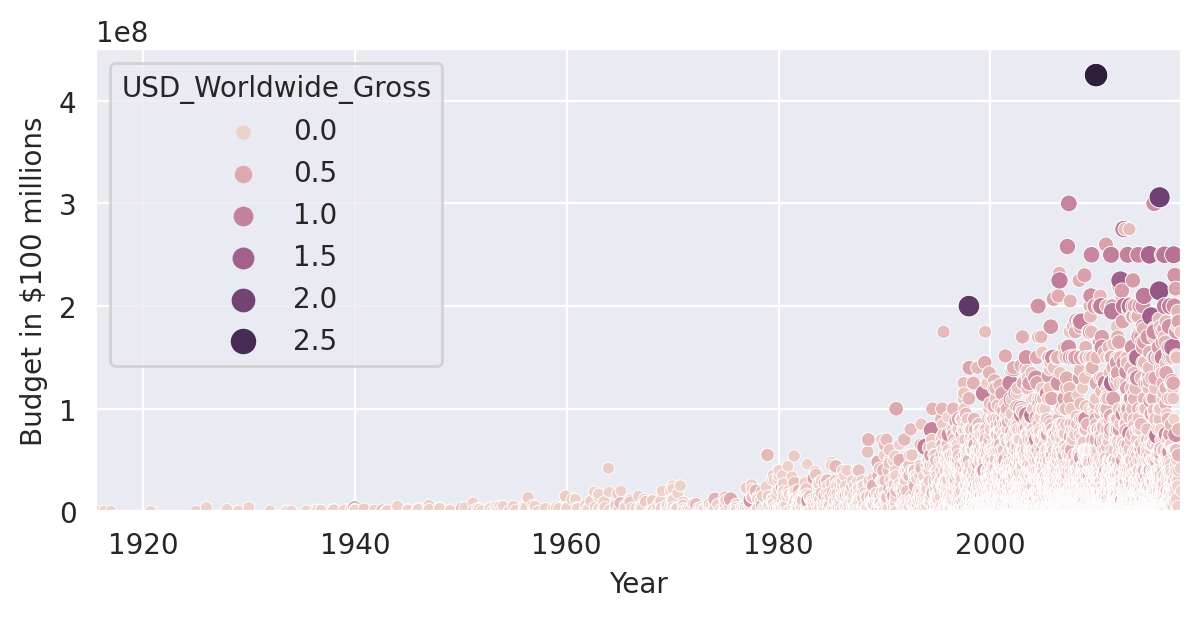

In [44]:
plt.figure(figsize=(7,3), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=df_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(df_clean.Release_Date.min(), df_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

In [48]:
# FROM THE ABOVE SCATTER PLOT, WE SEE:
# 1-Movie budgets have just exploded in the last 40 years
# 2 - Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s.

In [49]:
# Let divide our data into decade

dt_index = pd.DatetimeIndex(df_clean.Release_Date)
years = dt_index.year

In [50]:
decades = years//10*10
df_clean['Decade'] = decades

In [52]:
# Divide our film in subsets
old_films = df_clean[df_clean.Decade <= 1960]
new_films = df_clean[df_clean.Decade > 1960]

In [53]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,153.000000
mean,4274.771242,4.611298e+06,3.041963e+07,2.238947e+07,1949.150327
std,742.137130,5.713649e+06,5.493183e+07,3.264175e+07,12.719014
min,1253.000000,1.000000e+05,0.000000e+00,0.000000e+00,1910.000000
25%,3973.000000,1.250000e+06,5.273000e+06,5.000000e+06,1940.000000
50%,4434.000000,2.900000e+06,1.000000e+07,1.000000e+07,1950.000000
75%,4785.000000,5.000000e+06,3.320810e+07,2.835000e+07,1960.000000
max,5299.000000,4.200000e+07,3.905252e+08,1.986805e+08,1960.000000


In [54]:
old_films.sort_values(['USD_Production_Budget'], ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


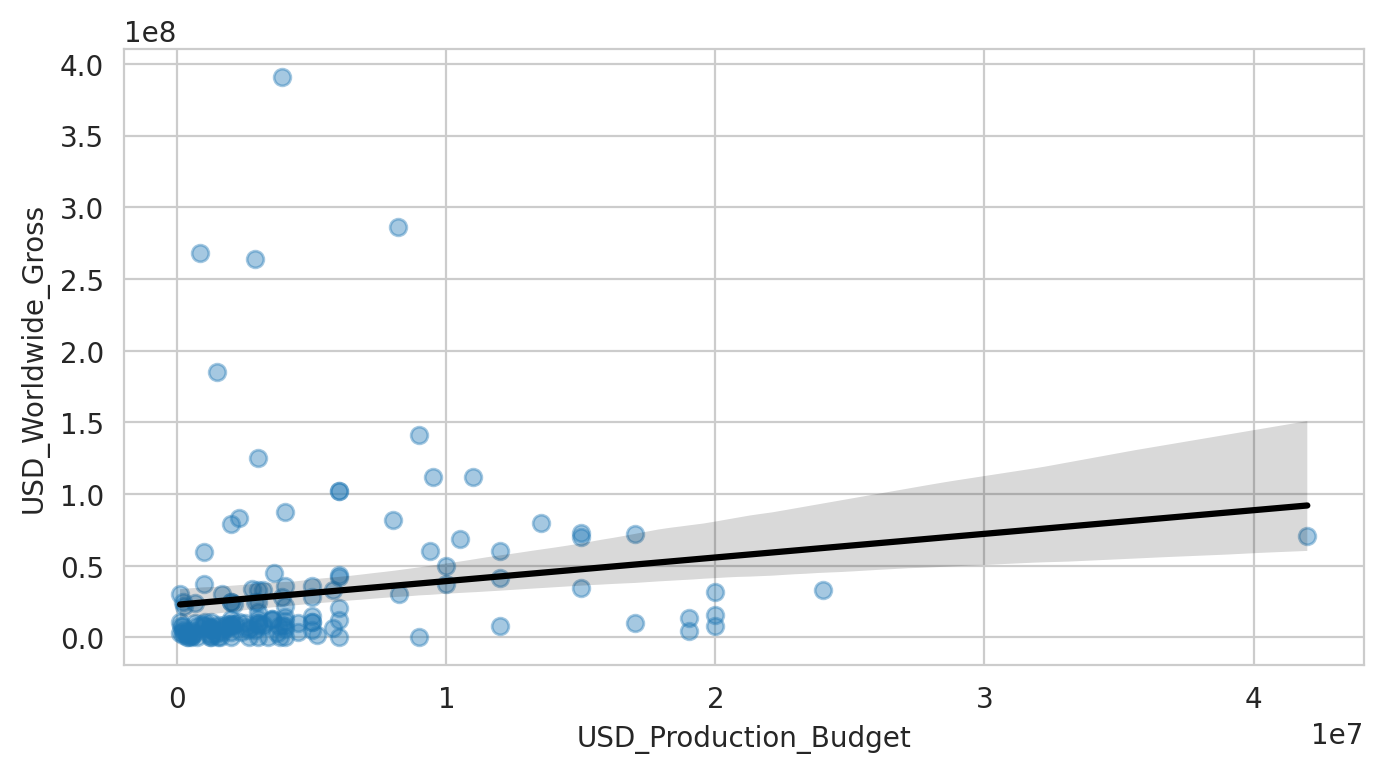

In [56]:
# Plotting Linear Regressions with Seaborn
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

In [57]:
# we see that many lower budget films made much more money! 
# The relationship between the production budget and movie revenue is not very strong.
# Many points on the left are very far away for the line, so the line appears not to capture 
# the relationship between budget and revenue very well at all!

# we can be  confident that there does indeed seem to be a relationship 
# between a film's budget and that film's worldwide revenue.

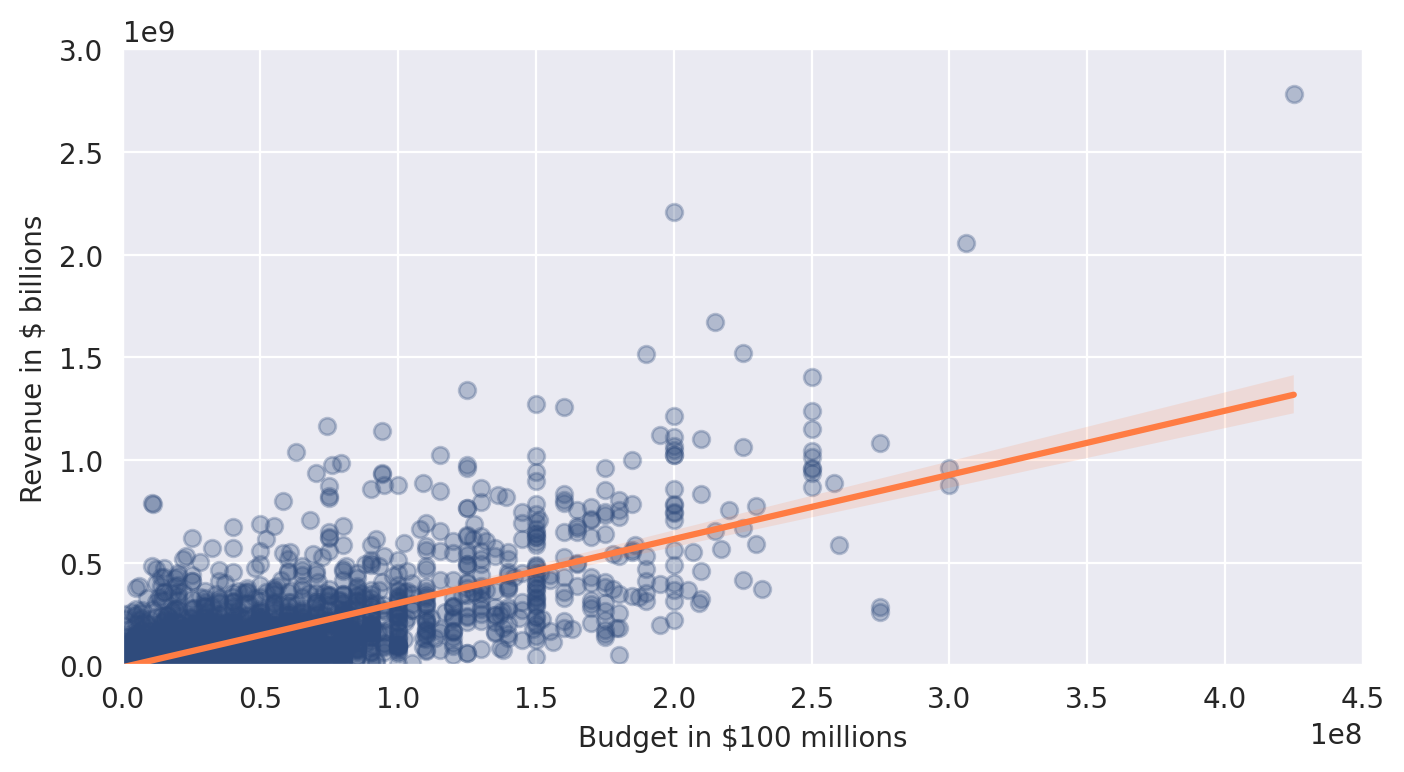

In [58]:
# The new film


plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 


In [59]:
#  the confidence interval is much narrower. We also see that a film with a $150 million budget is predicted 
# to make slightly under $500 million by our regression line.

In [61]:
# REGRESSION WITH SCIKITlEARN

from sklearn.linear_model import LinearRegression

regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])


# Find the best-fit line
regression.fit(X, y)




LinearRegression()

In [62]:
regression.intercept_

array([-8650768.00661029])

In [63]:
regression.coef_

array([[3.12259592]])

In [64]:
# The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1. 


In [65]:
# GOODNESS OF OUR MODEL
# R-squared
regression.score(X, y)

0.5577032617720403

In [66]:
# We see that our r-squared comes in at around 0.558. 
# This means that our model explains about 56% of the variance in movie revenue.

In [68]:
# PREDICTION FOR A BUDGET OF 455 BILLIONS $ USING OUR MODEL


budget = 455000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.412e+09.
